# NBA Hall of Fame or Ball of Lame

Video Link:
<br>

Name: Cobi Toeun <br>

Email: u1230512@utah.edu -- cobitoeun6901@gmail.com <br>

UID: u1230512 <br>

## Introduction and Description:

The *Naismith Memorial Basketball Hall of Fame* honors players who have shown exceptional skill at basketball, all-time great coaches, referees, and other major contributors to the sport. As part of the inaugural class of 1959, four players were inducted; over 150 more individuals have been inducted as players since then. Players are eligible for the Hall of Fame after they have been fully retired from play for at least three years.

A player or staff member can be considered a hall of famer for many different reasons; however, a predictive model is going to be trained to determine an *NBA players* chances (if they were to retire this season) through stats, awards, and accomplishments.

## Objectives:

What makes an NBA player one of the greatest in league history? <br>

To answer this question, I am going to web scrape, using *python*, the stats of recently retired and current (2021-2022 season) NBA players and create a model to predict their qualifications and probability as a future NBA Hall of Famer. 
<br>

To determine which players would be considered as an all time great, I am going to look at previous Hall of Famers who were inducted as a **player**. <br><br>



**Questions to consider:**

- What makes a player likely to be inducted into the hall of fame?
- What is the probablity of making it to the hall of famer for recently retired and current players?
- Do championships alone determine a players greatness, or can a player be considered an all-time great without a championship?
- What are the most common variables among current hall of famers? Which provide the strongest correlations?
- Can I create a model and algorithm to predict whether a player is likely to be chosen as a hall of famer based only on current stats?
- Can the model differentiate between HoF's inducted as coach or contributor? Can it determine if current HoF players should have been inducted?

**Benefits (What to learn and accomplish):**

- Use python libraries, including dataframes, beautifulsoup, mathplotlib, etc, to gather and express results scraped from [Basketball-Reference.com](https://www.basketball-reference.com/).
- Gain better knowledge on python web scraping and determining what methods are best used in certain scenarios.
- Find the bare minimum requirements to qualify as a Hall of Famer.
- Create a model and algorithm to predict a players chance of being a hall of famer, based on current hall of famers.

## Python Methods:
**Methods:**
- Web scraping (scrape using beautiful soup)
- String formatting (format string so I'll be able to extract mutiple different links)
- Loops and Conditional Statements (used in custom functions)
- Algorithms and Data Structures (use dictionaries, sets, lists to store data; algorithms for extraction)
- Regex (regular expressions)
- Dataframes and CSV files (store extracted data as a table; csv to use through analysis)
- Predictive Models (Choose models with the best accuracy given most correlated predictive variables):
    - Logistic Regression, SVM, Naive Bayes (*Probablisitc Classification*: predict probability of hof chances)
    - SVM, Decision Tree, Random Forest, K-NN (*Binary Classification*: predict whether recently retired/current player is hof lock)

**Data Visualizations:**
- Correlation Matrix (Check which variables best correlate with current Hall of Fame players)
- Heat Maps (Visualize correlation matrix)
- Scatter Plot Matrices
- Graphs (Line, Bar, Plot) (showcase stats, awards among hof and non-hof players)

## Data Description and Processing Summary:
All data has been web scraped from [Basketball-Reference.com](https://www.basketball-reference.com/).
To prevent web page overload, I have downloaded every page I need to complete analysis and predictions. Each page can be found in the [*Webpages*](Webpages) folder.
<br>

**Before computing Hall of Fame predictions, this is the data to search and extract:**
- Debut (Year), Last Active (Year), YOE, Active or Retired, Total Games
- Career points, rebounds, assists, blocks, and steals (per game and percentage)
- Averages (FG%, eFG%, FG3%, FT%, PER, WS)
- Awards and Accomplishments (All-stars, MVPs, Championships, DPOYs, All-NBA, etc.)
- Year Inducted, Inducted as Player or Coach or Contributor (For current HoF's)
<br>

**Here is an example of Michael Jordan's career stats and accomplishments:**
![mj_stats](images/mj_stats.png)
<br>

Using my browers built-in inspect function, I can view each HTML element then extract MJ's awards and stats using BeautifulSoup and my custom functions: <br>
![mj_awards.png](images/inspect_awards.png)
![image-4.png](images/inspect_stat.png)

After categorizing all the data extracted and storing them into a dataframe, I have converted each dataframe to a csv file so I wouldn't have to re-run the code each time I want to access it. CSV files can be accessed in [*csv_files*](csv_files) folder. <br><br>

**All acquired and cleaned data will be present in [webscraping-cleaning.ipynb](webscraping-cleaning.ipynb)** <br>
**If would like to view to whole scraping and cleaning process, please view the file by clicking the link.**

<br>

**Webscraped data have been extracted from these pages:**
- [Basketball-Reference Homepage](https://www.basketball-reference.com/)
- [NBA Player Directory](https://www.basketball-reference.com/players/)
- [Michael Jordan Career Stats](https://www.basketball-reference.com/players/j/jordami01.html) (we'll use MJ's page as an example, but I've scraped from all NBA players)

### Import libraries and load csv files

In [1]:
# import necessary libraries
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import math
import csv
import string
import warnings
warnings.filterwarnings('ignore') 

import statsmodels.formula.api as sm

from sklearn import tree, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

pd.set_option("display.max_rows", 100, "display.max_columns", 100)

## Exploratory Analysis

Here we will do actual analysis. Since we have already converted the dataframes to csv files, we won't have to run all the web-scraping algorithms.

In [182]:
# read csv files and store as dataframes
all_nba_players = pd.read_csv('csv_files/all_nba_players.csv')
retired_csv = pd.read_csv('csv_files/retired_players.csv')
hof_players = pd.read_csv('csv_files/hall_of_fame_players.csv')
retired_non_hof_csv = pd.read_csv('csv_files/retired_non_hof.csv')
active_csv = pd.read_csv('csv_files/active_players.csv')

In [183]:
# we'll only want to train and look at data from those who are officially elligible to enter -- retired at least 4 years
retired_hof_eligible = retired_csv[retired_csv['Last Active'] <= 2018].dropna();

In [8]:
# lets see some stats for all players who have played in the nba
all_nba_players.describe()

,Debut,Last Active,YOE,Retired,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Inducted as Player,Inducted as Coach,Inducted as Contributor,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.00000,4397.000000,4397.000000,4397.000000
mean,1991.204003,1996.766432,5.268820,0.807824,290.551740,6.455788,2992.915624,2.942188,1291.967478,1.456902,667.068228,0.459177,196.698658,0.269343,122.587901,41.443484,17.307619,67.131385,36.414373,11.044485,1.508710,14.771139,0.035934,0.031612,0.002502,0.001819,71.900614,0.411417,0.017057,0.016375,0.016602,0.010917,0.010917,0.209234,0.203775,0.112349,0.019331,0.126450,0.008187,0.008870,0.017967,0.00887,0.016830,0.012054,0.017285
std,20.994117,21.249146,4.500436,0.394056,320.393188,4.823565,4725.649713,2.276650,2129.285266,1.392988,1213.283236,0.414007,336.844494,0.368878,291.804208,10.820365,17.165869,20.159278,20.840834,6.664832,2.081922,27.272577,0.186146,0.174986,0.049960,0.042621,372.476628,1.663636,0.254049,0.269305,0.270555,0.157809,0.168947,0.717566,1.171334,0.315832,0.137702,0.834822,0.090123,0.113524,0.180725,0.14040,0.217916,0.169542,0.130344
min,1946.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.600000,-2.000000,-10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1976.000000,1982.000000,1.000000,1.000000,34.000000,2.900000,97.000000,1.300000,42.000000,0.500000,19.000000,0.100000,2.000000,0.000000,0.000000,37.600000,0.000000,62.300000,30.000000,8.700000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1993.000000,2000.000000,3.000000,1.000000,143.000000,5.200000,761.000000,2.400000,351.000000,1.000000,152.000000,0.400000,36.000000,0.200000,15.000000,42.700000,17.600000,71.800000,45.300000,11.600000,0.700000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2010.000000,2016.000000,8.000000,1.000000,490.000000,8.700000,3948.000000,3.900000,1713.000000,2.000000,752.000000,0.700000,250.000000,0.400000,110.000000,46.900000,32.700000,78.400000,49.800000,14.200000,2.400000,17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,2021.000000,2022.000000,22.000000,1.000000,1611.000000,30.100000,38387.000000,22.900000,23924.000000,11.200000,15806.000000,2.700000,3265.000000,3.500000,3830.000000,100.000000,100.000000,100.000000,150.000000,88.300000,17.900000,273.400000,1.000000,1.000000,1.000000,1.000000,2022.000000,19.000000,10.000000,11.000000,9.000000,6.000000,4.000000,11.000000,17.000000,1.000000

### Graphs and Plots

Here we will visually see trends for current hofs and non-hofs. We will look at the average basic and advanced stats for each HoF and HoF eligible player's career. <br>

We'll look at:
- **Bar Graphs**:
    - Positions with most Hall of Famers
    - Franchises with most Hall of Famers
    - Per Game Stats by Hall of Fame Status (PPG, RPG, APG, SPG, BPG)
    - Per Game Percentages by Hall of Fame Status (FG%, FG3%, FT%, PER, etc)
    - Career Stats by Hall of Fame Status (PTS, RBS, AST, STL, BLK) 
    
    - YOE by Hall of Fame Status
    - All-Star Selections by Hall of Fame Status
    - All-NBA Selections by Hall of Fame Status
    - NBA Championships by Hall of Fame Status
    - MVP Selections by Hall of Fame Status <br>
- **Scatter Plots**:
    - Total Games and PTS for Retired Players (HoF and Non-HoF)
    - Total RBS and AST for Retired Players (HoF and Non-HoF)
    - Total STL and BLK for Retired Players (HoF and Non-HoF) <br>
- **Correlation Graphs**:
    - Correlations with Hall of Fame (Inducted as Player)
    - Correlation Heat Map
    - Scatter Plot Matrix with most correlated to Hall of Fame (Inducted as Player)

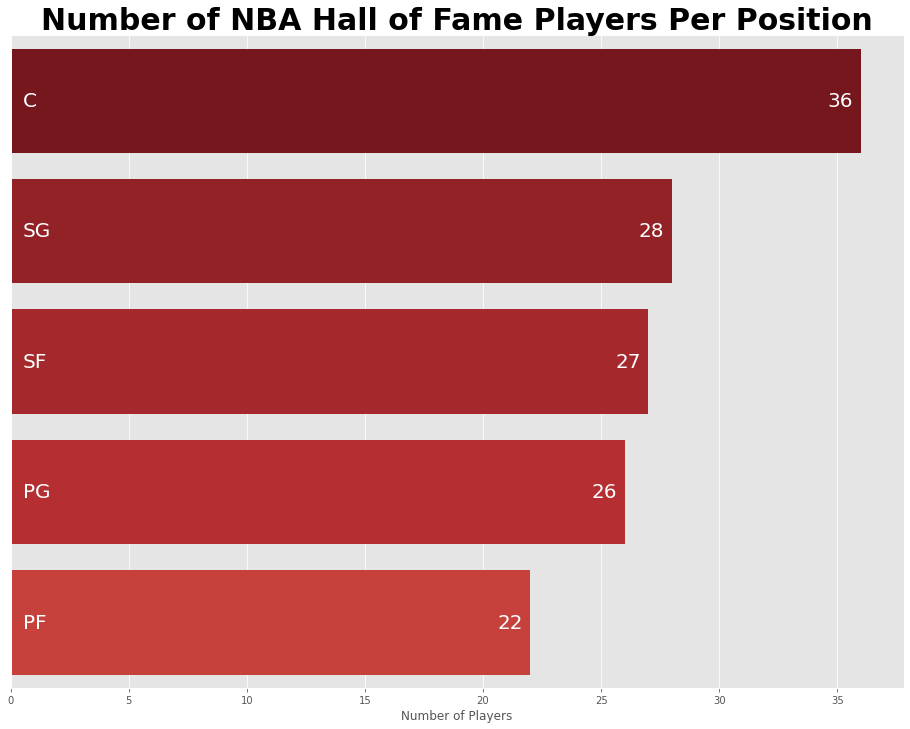

In [16]:
# get count of all positions for current hof players
num_pos = hof_players['Position'].dropna().value_counts()[:5] # there rre only five positions
hof_num_pos = pd.DataFrame(num_pos)
hof_num_pos.columns = ['Number of Players']

plt.figure(figsize=(16,12))
sns.barplot(x='Number of Players', y=hof_num_pos.index, data=hof_num_pos, 
            palette=sns.color_palette("Reds_r", 15))
plt.title('Number of NBA Hall of Fame Players Per Position', fontsize=30, fontweight="bold")
plt.gca().set_yticks([]);

# visually showcase position and counts on bars
for num in range(len(num_pos)):
    plt.text(num_pos[num]-1.4, num, num_pos[num], color='white', size=20, verticalalignment='center')
    plt.text(0.5, num, num_pos.index[num], color='white', size=20, verticalalignment='center')

# lets save the graph to view later
plt.savefig('graphs/hof_per_pos.png')
plt.show()

It's interesting to see that most players who have been inducted are centers. Lets note this fact because it will come up later when we look at correlations and create our models for predictions.

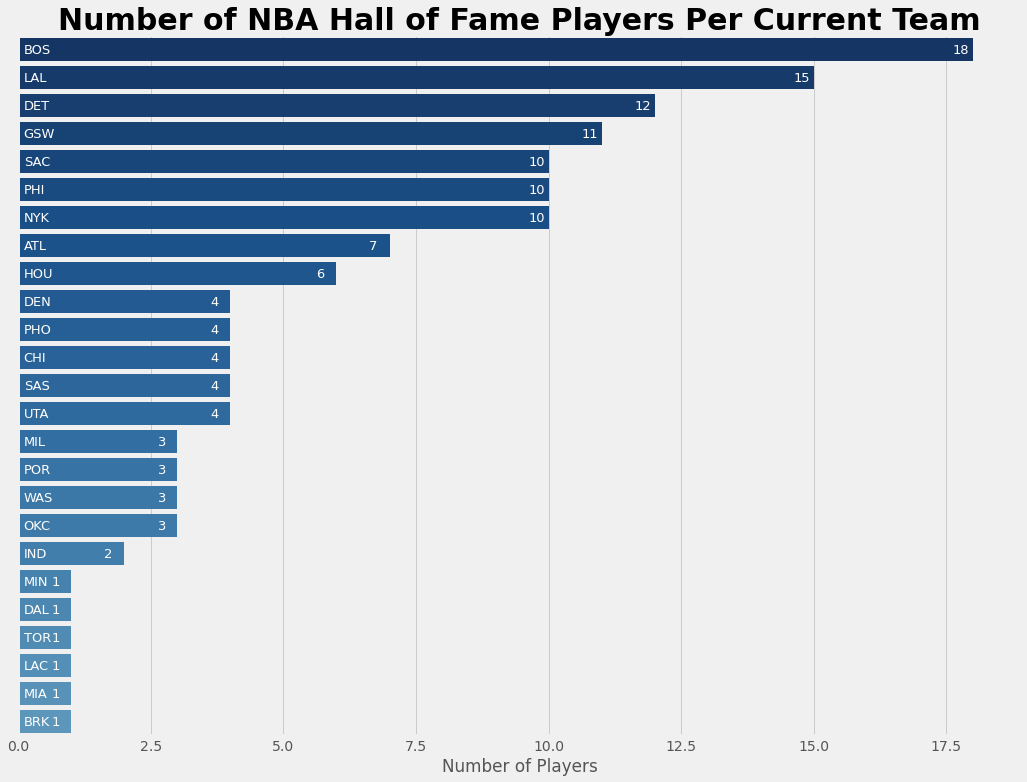

In [185]:
num_teams = hof_players['Team'].value_counts()[:30]
hof_num_teams = pd.DataFrame(num_teams)
hof_num_teams.columns = ['Number of Players']

plt.figure(figsize=(16,12))
sns.barplot(x='Number of Players', y=hof_num_teams.index, data=hof_num_teams, 
            palette=sns.color_palette("Blues_r", 60))
plt.title('Number of NBA Hall of Fame Players Per Current Team', fontsize=30, fontweight="bold")
plt.gca().set_yticks([]);

for num in range(len(num_teams)):
    plt.text(num_teams[num]-0.38, num, num_teams[num], color='white', size=13, verticalalignment='center')
    plt.text(0.1, num, num_teams.index[num], color='white', size=13, verticalalignment='center')

plt.savefig('graphs/hof_per_team.png')
plt.show()

The top two franchises are unsurprising due to the fact that the Lakers and Celtics both lead in NBA Championships, with 17.

Franchises who don't have don't have a hof player associated with them include:
- Cleveland Cavaliers
- Memphis Grizzlies
- Charlotte Hornets
- New Orleans Pelicans
- Orlando Magic

However, **Lebron James** is likely going to be the first for Cleveland.

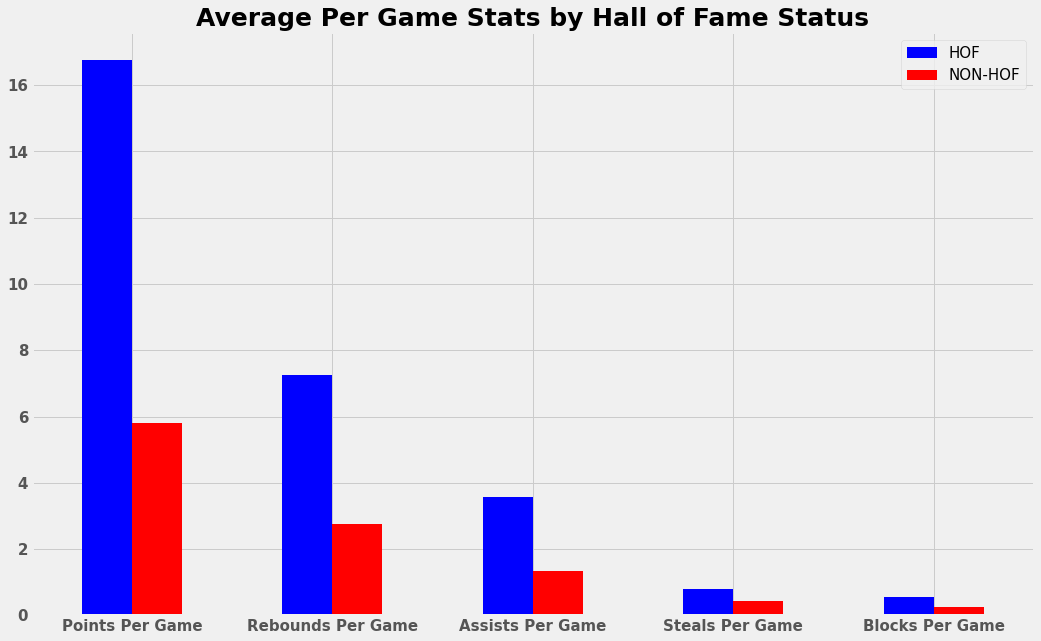

In [188]:
graph_hof_basic = retired_hof_eligible.groupby('Hall of Fame')['Career PPG','Career RPG',
                                                           'Career APG','Career SPG','Career BPG']
graph_hof_basic = graph_hof_basic.mean().transpose()
graph_hof_basic = graph_hof_basic.rename({'Career PPG': 'Points Per Game', 
                                  'Career RPG': 'Rebounds Per Game', 
                                  'Career APG': 'Assists Per Game',
                                   'Career SPG': 'Steals Per Game',
                                    'Career BPG': 'Blocks Per Game'},
                                   axis='index')
graph_hof_basic = graph_hof_basic.rename({1:'HOF', 0:'NON-HOF'}, axis='columns')
graph_hof_basic[graph_hof_basic.columns[::-1]].plot(kind='bar',color={'HOF':'Blue','NON-HOF':'Red'},
                                                    figsize=(16,10), rot=0)

plt.legend(prop={'size':15})
plt.title('Average Per Game Stats by Hall of Fame Status', fontsize=25, fontweight="bold")
plt.xticks(size = 15, fontweight='bold')
plt.yticks(size = 15, fontweight='bold')

plt.savefig('graphs/hofvsnonhof_avgperstats.png')
plt.show()

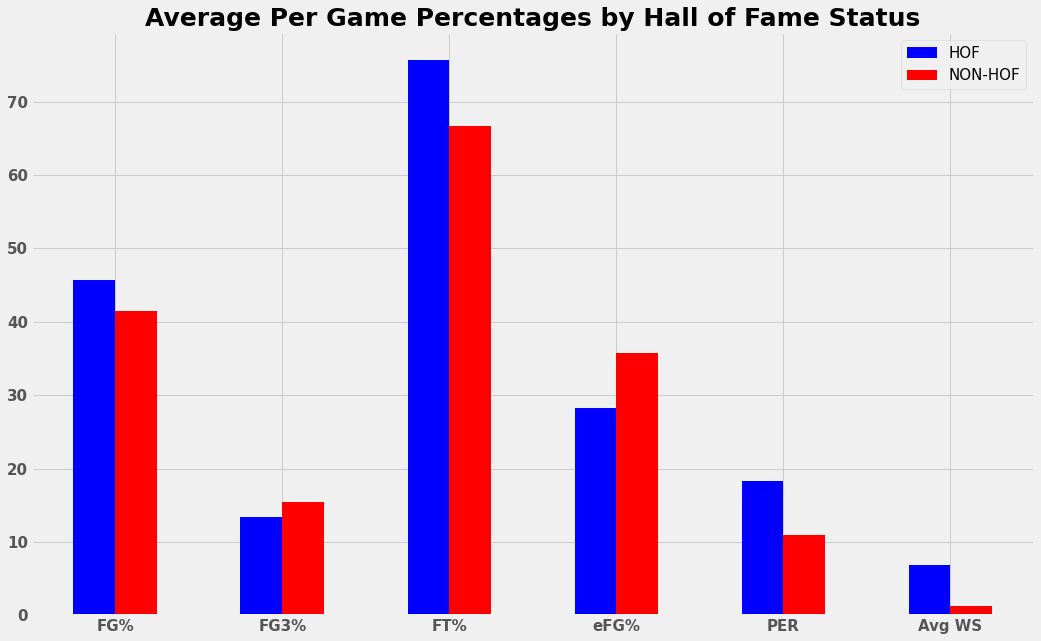

In [187]:
graph_hof_percentage = retired_hof_eligible.groupby('Hall of Fame')['Career FG%','Career FG3%',
                                                            'Career FT%','Career eFG%', 'PER', 'Avg WS']
graph_hof_percentage = graph_hof_percentage.mean().transpose()
graph_hof_percentage = graph_hof_percentage.rename({'Career FG%': 'FG%', 
                                  'Career FG3%': 'FG3%', 
                                  'Career FT%': 'FT%',
                                   'Career eFG%': 'eFG%'},
                                   axis='index')
graph_hof_percentage = graph_hof_percentage.rename({1:'HOF', 0:'NON-HOF'}, axis='columns')
graph_hof_percentage[graph_hof_percentage.columns[::-1]].plot(kind='bar',color={'HOF':'Blue','NON-HOF':'Red'},
                                                figsize=(16,10), rot=0)

plt.legend(prop={'size':15})
plt.title('Average Per Game Percentages by Hall of Fame Status', fontsize=25, fontweight="bold")
plt.xticks(size = 15, fontweight='bold')
plt.yticks(size = 15, fontweight='bold')

plt.savefig('graphs/hofvsnonhof_avgpergame.png')
plt.show()

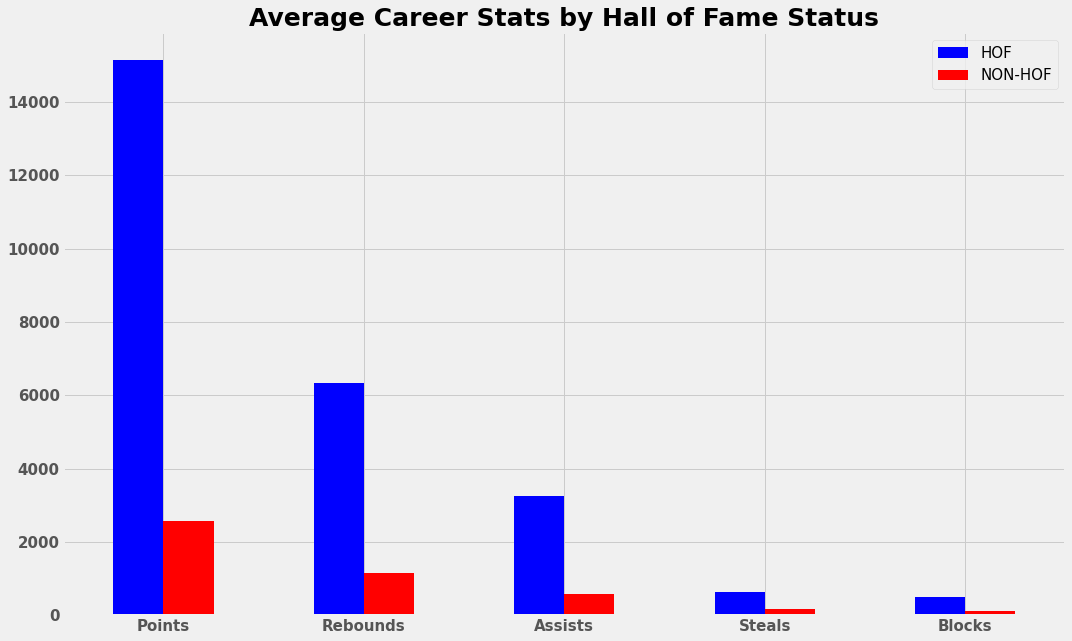

In [186]:
graph_hof_career = retired_hof_eligible.groupby('Hall of Fame')['Total PTS',
                                                               'Total RBS','Total AST',
                                                               'Total STL','Total BLK']
graph_hof_career = graph_hof_career.mean().transpose()
graph_hof_career = graph_hof_career.rename({'Total PTS': 'Points', 
                                  'Total RBS': 'Rebounds',
                                   'Total AST': 'Assists',
                                    'Total STL': 'Steals',
                                    'Total BLK': 'Blocks'},
                                   axis='index')
graph_hof_career = graph_hof_career.rename({1:'HOF', 0:'NON-HOF'}, axis='columns')
graph_hof_career[graph_hof_career.columns[::-1]].plot(kind='bar',color={'HOF':'Blue','NON-HOF':'Red'},
                                                  figsize=(16,10), rot=0)

plt.legend(prop={'size':15})
plt.title('Average Career Stats by Hall of Fame Status', fontsize=25, fontweight="bold")
plt.xticks(size = 15, fontweight='bold')
plt.yticks(size = 15, fontweight='bold')

plt.savefig('graphs/hofvsnonhof_avgcareerstats.png')
plt.show()

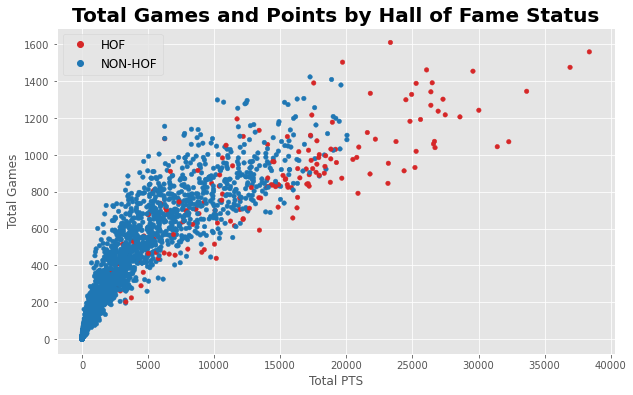

In [13]:
hof_type = {1:'tab:red',0:'tab:blue'}

retired_hof_eligible.plot.scatter('Total PTS', 'Total Games', 
                        c=retired_hof_eligible['Hall of Fame'].map(hof_type), colormap='jet')

plt.title('Total Games and Points by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
plt.legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1)

plt.savefig('graphs/hofvsnonhof_totgamesandpts.png')
plt.show()

Those who score more than 20,000 career points and play 1,450 games are practically guaranteed to be inducted into the Hall of Fame as a player.

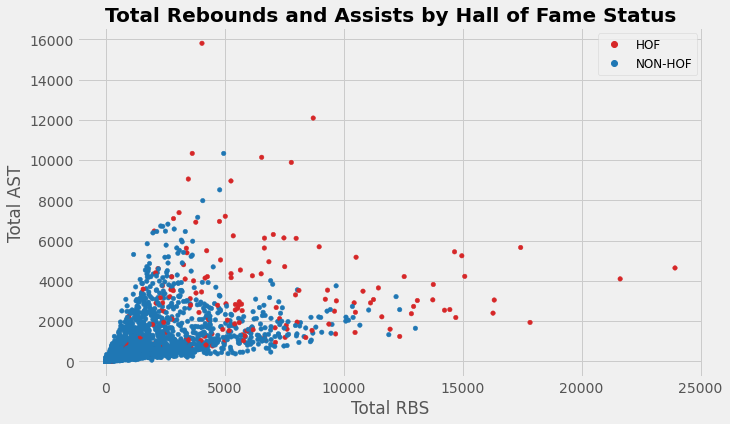

In [192]:
hof_type = {1:'tab:red',0:'tab:blue'}

retired_hof_eligible.plot.scatter('Total RBS', 'Total AST', 
                        c=retired_hof_eligible['Hall of Fame'].map(hof_type), colormap='jet')

plt.title('Total Rebounds and Assists by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
plt.legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1)

plt.savefig('graphs/hofvsnonhof_totrbsandasts.png')
plt.show()

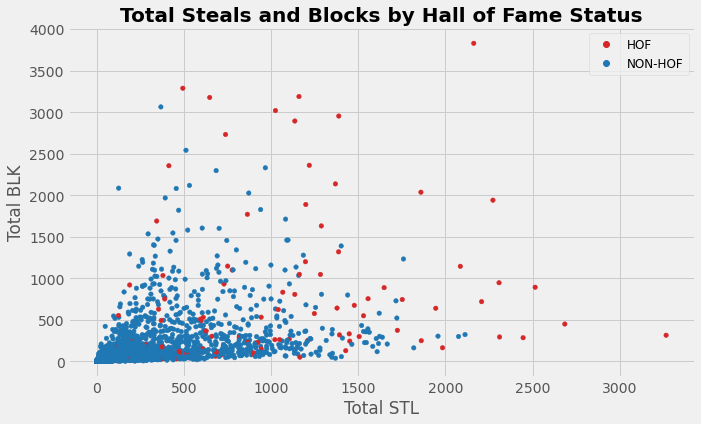

In [193]:
hof_type = {1:'tab:red',0:'tab:blue'}

retired_hof_eligible.plot.scatter('Total STL', 'Total BLK', 
                    c=retired_hof_eligible['Hall of Fame'].map(hof_type), colormap='jet')

plt.title('Total Steals and Blocks by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
plt.legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1)

plt.savefig('graphs/hofvsnonhof_totstlssandblks.png')
plt.show()

### Let's check out some correlations

In [18]:
print(retired_hof_eligible.shape)

(3302, 48)


In [19]:
#correlation matrix #we'll also drop the retired column since it's not particularly useful
corr = retired_hof_eligible.drop(columns=['Retired']).corr()
display(corr)

,Debut,Last Active,YOE,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Inducted as Player,Inducted as Coach,Inducted as Contributor,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
Debut,1.000000,0.964346,-0.103473,-0.170779,-0.276734,-0.185076,-0.303960,-0.195286,-0.226394,-0.157757,0.142457,0.025496,0.131721,0.028629,0.032251,0.405419,-0.133824,0.620471,-0.122723,-0.244043,-0.162335,-0.220779,-0.188099,-0.087160,-0.088094,-0.219763,-0.187123,-0.058888,-0.052818,-0.051768,-0.009011,-0.007447,-0.158304,-0.119228,0.002953,-0.094791,-0.044511,0.036696,0.014667,-0.082528,0.006236,-0.058584,-0.026143,-0.106510
Last Active,0.964346,1.000000,0.158872,0.082057,-0.087425,0.030764,-0.147901,0.006544,-0.084209,0.028539,0.284094,0.220436,0.245868,0.178449,0.123636,0.472617,-0.043217,0.681354,-0.009751,-0.046560,0.042223,-0.132193,-0.099392,-0.078307,-0.076190,-0.131092,-0.071286,-0.025642,-0.020888,-0.016925,0.022627,0.025436,-0.066370,-0.030736,0.106836,-0.040657,0.031490,0.068886,0.054702,-0.029174,0.038642,-0.012765,0.016346,-0.032348
YOE,-0.103473,0.158872,1.000000,0.972608,0.721036,0.832548,0.593700,0.778762,0.537152,0.716956,0.549727,0.756984,0.442364,0.581744,0.346716,0.256990,0.332502,0.237624,0.429860,0.759103,0.790811,0.335838,0.336810,0.034152,0.042352,0.336217,0.441755,0.118316,0.124666,0.121438,0.113536,0.127699,0.344813,0.334502,0.405287,0.204205,0.295901,0.122863,0.155332,0.196255,0.124183,0.167910,0.152780,0.280016
Total Games,-0.170779,0.082057,0.972608,1.000000,0.768907,0.885793,0.629463,0.824255,0.580589,0.767100,0.567582,0.788230,0.429055,0.590267,0.337012,0.222642,0.332856,0.182717,0.439767,0.820018,0.842625,0.375406,0.376040,0.040117,0.046916,0.375739,0.489025,0.130217,0.136403,0.137884,0.127724,0.127992,0.361903,0.361874,0.433060,0.224631,0.327984,0.111514,0.159316,0.217397,0.128612,0.189542,0.167035,0.313264
Career PPG,-0.276734,-0.087425,0.721036,0.768907,1.000000,0.888126,0.676151,0.708922,0.658688,0.697896,0.569231,0.640739,0.313792,0.408544,0.335688,0.194418,0.397150,0.074322,0.547756,0.864338,0.795789,0.497365,0.510702,0.026055,0.042871,0.497071,0.629263,0.267021,0.154525,0.123530,0.152616,0.069953,0.279184,0.493056,0.528146,0.350129,0.267471,0.121978,0.119661,0.343930,0.078411,0.264730,0.232940,0.408888
Total PTS,-0.185076,0.030764,0.832548,0.885793,0.888126,1.000000,0.626561,0.836518,0.607267,0.801335,0.559943,0.770921,0.373182,0.550252,0.274797,0.184302,0.286658,0.121072,0.457911,0.893789,0.943714,0.553074,0.572287,0.025355,0.034013,0.553196,0.737605,0.290263,0.204776,0.167619,0.176066,0.123496,0.355591,0.593075,0.524214,0.359613,0.390702,0.117533,0.159190,0.404094,0.121268,0.350074,0.304869,0.513365
Career RPG,-0.303960,-0.147901,0.593700,0.629463,0.676151,0.626561,1.000000,0.847615,0.258406,0.364491,0.253848,0.366071,0.529965,0.530899,0.314142,-0.071999,0.165257,-0.026061,0.440133,0.726040,0.650700,0.415041,0.418160,0.024076,0.065760,0.414344,0.495787,0.185621,0.307339,0.048264,0.049592,0.149531,0.269958,0.381575,0.367003,0.313862,0.261901,0.060788,0.070408,0.239661,0.142879,0.291252,0.166618,0.342570
Total RBS,-0.195286,0.006544,0.778762,0.824255,0.708922,0.836518,0.847615,1.000000,0.368408,0.568083,0.385801,0.591684,0.539389,0.691547,0.288314,0.057400,0.185797,0.086902,0.408568,0.820915,0.866411,0.493633,0.504308,0.026611,0.052131,0.493404,0.648516,0.219927,0.368648,0.097220,0.085670,0.206470,0.358065,0.509422,0.436399,0.349779,0.407330,0.077298,0.112197,0.313223,0.200343,0.391043,0.246814,0.462945
Career APG,-0.226394,-0.084209,0.537152,0.580589,0.658688,0.607267,0.258406,0.368408,1.000000,0.861006,0.640175,0.636898,0.001764,0.131106,0.141500,0.235952,0.340623,0.028777,0.345074,0.604139,0.5

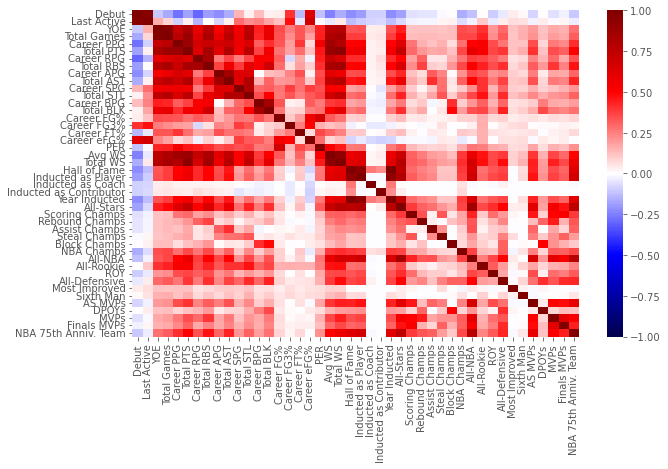

In [20]:
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            vmin=-1, vmax=1, cmap='seismic');

plt.savefig('graphs/correlation_heatmap.png')
plt.show()

In [21]:
#correlation matrix
hof_corr = retired_hof_eligible.drop(columns=['Retired','Year Inducted']).corr()['Inducted as Player']
display(hof_corr)

Debut                     -0.188099
Last Active               -0.099392
YOE                        0.336810
Total Games                0.376040
Career PPG                 0.510702
Total PTS                  0.572287
Career RPG                 0.418160
Total RBS                  0.504308
Career APG                 0.355894
Total AST                  0.470632
Career SPG                 0.204937
Total STL                  0.310720
Career BPG                 0.200682
Total BLK                  0.289163
Career FG%                 0.100079
Career FG3%               -0.003598
Career FT%                 0.103550
Career eFG%               -0.041257
PER                        0.270606
Avg WS                     0.603058
Total WS                   0.630525
Hall of Fame               0.935127
Inducted as Player         1.000000
Inducted as Coach         -0.012120
Inducted as Contributor   -0.010331
All-Stars                  0.796907
Scoring Champs             0.316135
Rebound Champs             0

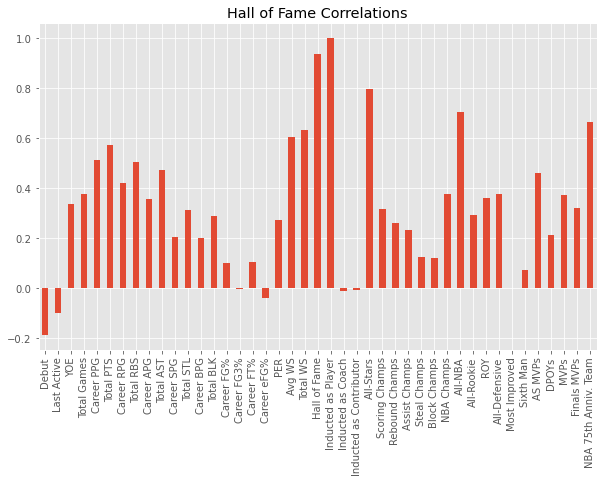

In [22]:
hof_corr.plot.bar()
plt.title('Hall of Fame Correlations')

plt.savefig('graphs/correlation_graph.png')
plt.show()

In [23]:
hof_corr_dict = hof_corr.to_dict()

In [24]:
# we don't want these variables since they directly correlate to hof status
remove_key = ['Hall of Fame', 'Inducted as Player']
[hof_corr_dict.pop(var) for var in remove_key]

[0.9351268552553833, 1.0]

Lets choose all variables that have a moderate-strong positive correlation; which is anything above 0.50 (nearest 2 decimal points):

In [125]:
predictive_variables = [key for key, value in hof_corr_dict.items() if round(value, 2) >= 0.5]

In [126]:
print(predictive_variables, len(predictive_variables))
print('Hall of Fame' in predictive_variables)

['Career PPG', 'Total PTS', 'Total RBS', 'Avg WS', 'Total WS', 'All-Stars', 'All-NBA', 'NBA 75th Anniv. Team'] 8
False


## Analysis Methodology - Predictive Analysis

Lets go ahead and do some predictions:

In [127]:
X, y = retired_hof_eligible[predictive_variables], retired_hof_eligible['Inducted as Player']

The sample size is quite small, so there isn't much need to train-test split.

In [128]:
# X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Probabliity Classification

In [129]:
logistic_reg = LogisticRegression(solver='liblinear', C=10.0, random_state=42).fit(X, y)
y_pred = logistic_reg.predict(X)

print(metrics.classification_report(y, y_pred)); print()
print('Accuracy:', metrics.accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(metrics.confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3163
           1       0.91      0.81      0.85       139

    accuracy                           0.99      3302
   macro avg       0.95      0.90      0.92      3302
weighted avg       0.99      0.99      0.99      3302


Accuracy: 0.9884918231374924
Mean Abs Error:  0.01150817686250757
Mean Squared Error:  0.01150817686250757

[[3152   11]
 [  27  112]]



In [130]:
# use platt scaling to calibrate and transform into probablity model
svm_model = svm.SVC(kernel='linear', random_state=42, probability=True).fit(X, y)
y_pred = svm_model.predict(X)

print(metrics.classification_report(y, y_pred)); print()
print('Accuracy:', metrics.accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(metrics.confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3163
           1       0.85      0.81      0.83       139

    accuracy                           0.99      3302
   macro avg       0.92      0.90      0.91      3302
weighted avg       0.99      0.99      0.99      3302


Accuracy: 0.9860690490611751
Mean Abs Error:  0.013930950938824955
Mean Squared Error:  0.013930950938824955

[[3143   20]
 [  26  113]]



In [131]:
bayes = GaussianNB().fit(X, y)
y_pred = bayes.predict(X)

print(metrics.classification_report(y, y_pred)); print()
print('Accuracy: ', metrics.accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(metrics.confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3163
           1       0.46      0.92      0.62       139

    accuracy                           0.95      3302
   macro avg       0.73      0.94      0.80      3302
weighted avg       0.97      0.95      0.96      3302


Accuracy:  0.951847365233192
Mean Abs Error:  0.04815263476680799
Mean Squared Error:  0.04815263476680799

[[3015  148]
 [  11  128]]



# Binary Classification

In [132]:
svm_binary = svm.SVC(random_state=42).fit(X, y)
y_pred = svm_binary.predict(X)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3163
           1       0.79      0.43      0.56       139

    accuracy                           0.97      3302
   macro avg       0.88      0.71      0.77      3302
weighted avg       0.97      0.97      0.97      3302


Accuracy:  0.9712295578437311
Mean Abs Error:  0.02877044215626893
Mean Squared Error:  0.02877044215626893

[[3147   16]
 [  79   60]]



In [133]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5).fit(X, y)
y_pred = decision_tree.predict(X)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3163
           1       0.96      0.87      0.91       139

    accuracy                           0.99      3302
   macro avg       0.98      0.93      0.95      3302
weighted avg       0.99      0.99      0.99      3302


Accuracy:  0.9930345245305875
Mean Abs Error:  0.006965475469412477
Mean Squared Error:  0.006965475469412477

[[3158    5]
 [  18  121]]



In [134]:
rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42, 
                                     max_depth=8).fit(X, y)
y_pred = rand_forest.predict(X)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3163
           1       1.00      0.92      0.96       139

    accuracy                           1.00      3302
   macro avg       1.00      0.96      0.98      3302
weighted avg       1.00      1.00      1.00      3302


Accuracy:  0.9966686856450636
Mean Abs Error:  0.0
Mean Squared Error:  0.003331314354936402

[[3163    0]
 [  11  128]]



In [135]:
knn = KNeighborsClassifier(n_neighbors=10).fit(X, y)
y_pred = knn.predict(X)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3163
           1       0.81      0.41      0.55       139

    accuracy                           0.97      3302
   macro avg       0.89      0.70      0.77      3302
weighted avg       0.97      0.97      0.97      3302


Accuracy:  0.9712295578437311
Mean Abs Error:  0.02877044215626893
Mean Squared Error:  0.02877044215626893

[[3150   13]
 [  82   57]]



In [136]:
def set_prob(row):
    player = row[predictive_variables]
    hof_probability = logistic_reg.predict_proba([player]);
    return hof_probability[0][1]

In [137]:
def hof_binary(row):
    player = row[predictive_variables]
    hof_binary = rand_forest.predict([player]);
    return hof_binary[0]

In [138]:
nba_players_hof_prob = all_nba_players

In [139]:
show_columns = ['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','HOF (Y/N)','Inducted as Player']

In [140]:
nba_players_hof_prob['HOF Probability'] = nba_players_hof_prob.apply(lambda row: set_prob(row), axis=1)

In [141]:
nba_players_hof_prob['HOF (Y/N)'] = nba_players_hof_prob.apply(lambda row: hof_binary(row), axis=1)

In [142]:
nba_players_hof_prob[show_columns][nba_players_hof_prob['Hall of Fame'] == 1].to_csv('csv_files/hof_players_prob.csv', index=False)

In [143]:
nba_players_hof_prob_to_csv = nba_players_hof_prob[show_columns]

In [144]:
display(nba_players_hof_prob_to_csv)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player
0,Alaa Abdelnaby,1990,1995,5,PF,POR,0.002073,0,0
1,Zaid Abdul-Aziz,1968,1978,10,C,HOU,0.002916,0,0
2,Kareem Abdul-Jabbar,1969,1989,20,C,LAL,1.000000,1,1
3,Mahmoud Abdul-Rauf,1990,2001,9,PG,DEN,0.005625,0,0
4,Tariq Abdul-Wahad,1997,2003,6,SG,DEN,0.001352,0,0
...,...,...,...,...,...,...,...,...,...
4392,Paul Zipser,2016,2018,2,SF,CHI,0.000881,0,0
4393,Ante Žižić,2017,2020,3,C,CLE,0.002583,0,0
4394,Jim Zoet,1982,1983,1,C,DET,0.000914,0,0
4395,Bill Zopf,1970,1971,1,PG,MIL,0.000859,0,0


In [145]:
nba_players_hof_prob_to_csv.to_csv('csv_files/nba_players_hof_prob.csv', index=False)

In [146]:
nba_players_hof_prob = nba_players_hof_prob.dropna()

In [147]:
nba_players_hof_prob.to_csv('csv_files/nba_players_hof_prob_with_stats.csv', index=False)

In [148]:
nba_players_hof_prob = pd.read_csv('csv_files/nba_players_hof_prob_with_stats.csv')

In [149]:
last_active = 2019; year_inducted = last_active+4

# predict 2022 hall of fame inductees
hof_prob = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
retired_non_hof = hof_prob[(hof_prob['Last Active'] <= last_active) &
                                    (hof_prob['Retired'] == 1) &
                                  (hof_prob['Hall of Fame'] == 0) |
                                 (hof_prob['Year Inducted'] == year_inducted) &
                                 (hof_prob['Hall of Fame'] == 1)]

In [150]:
# lets grab the only columns we need
retired_non_hof = retired_non_hof[show_columns]
hof_players_prob = hof_prob[['Player','Debut','Last Active','YOE','Position',
            'Team', 'HOF Probability','HOF (Y/N)','Year Inducted','Inducted as Player']]

display(retired_non_hof.head(15))

# check if model predicted previous hof inductees
display(retired_non_hof[retired_non_hof['HOF (Y/N)'] == 1])

# show 2018 (previous year) hof inductees
display(hof_players_prob[(hof_players_prob['Year Inducted'] == year_inducted) &
                        (hof_players_prob['Inducted as Player'] == 1)])

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player
2757,Dirk Nowitzki,1998,2019,21,PF,DAL,0.999994,1,0
3816,Dwyane Wade,2003,2019,16,SG,MIA,0.999953,1,0
1191,Larry Foust,1950,1962,12,C,DET,0.931547,0,0
3548,Amar'e Stoudemire,2002,2016,14,PF,PHO,0.919118,0,0
837,Brad Daugherty,1986,1994,8,C,CLE,0.909162,0,0
1892,Marques Johnson,1977,1990,11,SF,MIL,0.870376,0,0
1886,Kevin Johnson,1987,2000,12,PG,PHO,0.845133,0,0
1273,Pau Gasol,2001,2019,18,C,MEM,0.830497,1,0
2004,Shawn Kemp,1989,2003,14,PF,OKC,0.808774,0,0
2868,Tony Parker,2001,2019,18,PG,SAS,0.723936,1,0


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player
2757,Dirk Nowitzki,1998,2019,21,PF,DAL,0.999994,1,0
3816,Dwyane Wade,2003,2019,16,SG,MIA,0.999953,1,0
1273,Pau Gasol,2001,2019,18,C,MEM,0.830497,1,0
2868,Tony Parker,2001,2019,18,PG,SAS,0.723936,1,0


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Year Inducted,Inducted as Player


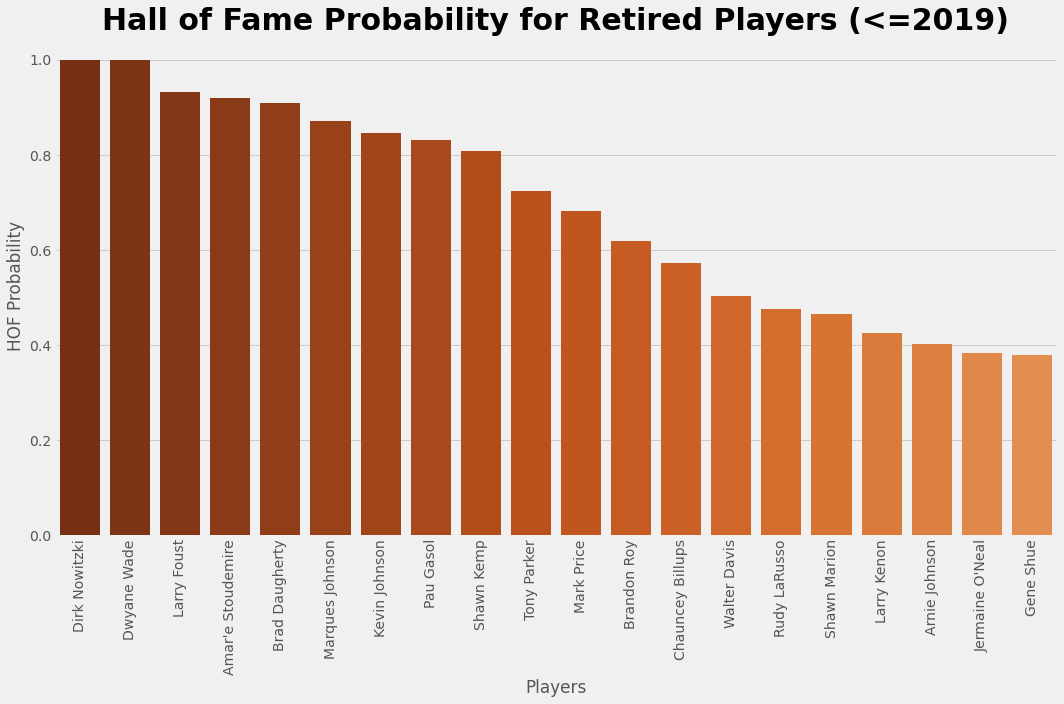

In [151]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=retired_non_hof[:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(retired_non_hof['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Retired Players (<=2019)', fontsize=30, fontweight='bold')
plt.tight_layout()

plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [152]:
# predict active inductees
active_players = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
active_players = active_players[(active_players['Last Active'] == 2022) |
                               (active_players['Retired'] == 0)]

In [153]:
# show top active players hof probability chances, and which are current locks
display(active_players[show_columns].head(50))
print(active_players.shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0
1012,Kevin Durant,2007,2022,14,SF,OKC,0.999995,1,0
2885,Chris Paul,2005,2022,17,PG,NOP,0.999992,1,0
1496,James Harden,2009,2022,13,SG,HOU,0.999975,1,0
3937,Russell Westbrook,2008,2022,14,PG,OKC,0.999846,1,0
818,Stephen Curry,2009,2022,13,PG,GSW,0.999692,1,0
107,Giannis Antetokounmpo,2013,2022,9,PF,MIL,0.999489,1,0
2213,Damian Lillard,2012,2022,10,PG,POR,0.999457,1,0
842,Anthony Davis,2012,2022,10,PF,NOP,0.999391,1,0
110,Carmelo Anthony,2003,2022,19,SF,DEN,0.997350,1,0


(845, 50)


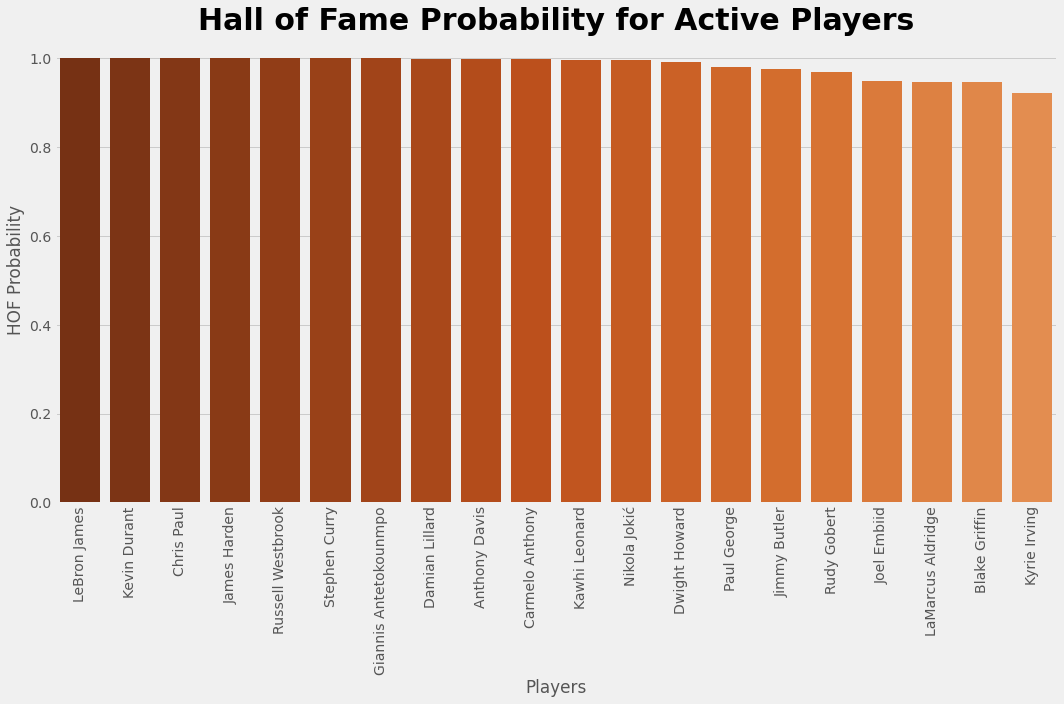

In [173]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=active_players[:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(active_players['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Active Players', fontsize=30, fontweight='bold')
plt.tight_layout()

# plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [154]:
# check which current players in NBA 75th anniv. team are hof locks
display(active_players[show_columns][active_players['NBA 75th Anniv. Team'] == 1].head(20))
print(active_players[show_columns][active_players['NBA 75th Anniv. Team'] == 1].shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0
1012,Kevin Durant,2007,2022,14,SF,OKC,0.999995,1,0
2885,Chris Paul,2005,2022,17,PG,NOP,0.999992,1,0
1496,James Harden,2009,2022,13,SG,HOU,0.999975,1,0
3937,Russell Westbrook,2008,2022,14,PG,OKC,0.999846,1,0
818,Stephen Curry,2009,2022,13,PG,GSW,0.999692,1,0
107,Giannis Antetokounmpo,2013,2022,9,PF,MIL,0.999489,1,0
2213,Damian Lillard,2012,2022,10,PG,POR,0.999457,1,0
842,Anthony Davis,2012,2022,10,PF,NOP,0.999391,1,0
110,Carmelo Anthony,2003,2022,19,SF,DEN,0.997350,1,0


(11, 9)


In [155]:
# check for active players who are predicted to be hof locks
display(active_players[show_columns][active_players['HOF (Y/N)'] == 1])
print(active_players[show_columns][active_players['HOF (Y/N)'] == 1].shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0
1012,Kevin Durant,2007,2022,14,SF,OKC,0.999995,1,0
2885,Chris Paul,2005,2022,17,PG,NOP,0.999992,1,0
1496,James Harden,2009,2022,13,SG,HOU,0.999975,1,0
3937,Russell Westbrook,2008,2022,14,PG,OKC,0.999846,1,0
818,Stephen Curry,2009,2022,13,PG,GSW,0.999692,1,0
107,Giannis Antetokounmpo,2013,2022,9,PF,MIL,0.999489,1,0
2213,Damian Lillard,2012,2022,10,PG,POR,0.999457,1,0
842,Anthony Davis,2012,2022,10,PF,NOP,0.999391,1,0
110,Carmelo Anthony,2003,2022,19,SF,DEN,0.997350,1,0


(25, 9)


In [171]:
# check for active players who aren't predicted to be hof locks (first ballot), but soon to be hofs
display(active_players[show_columns][active_players['HOF (Y/N)'] == 0].head(25))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted,Inducted as Coach,Inducted as Contributor
3712,Karl-Anthony Towns,2015,2022,7,C,MIN,0.901526,0,0,0,0,0,0
3373,Ben Simmons,2017,2021,4,PG,PHI,0.852522,0,0,0,0,0,0
949,Luka Dončić,2018,2022,4,PG,DAL,0.836776,0,0,0,0,0,0
3594,Jayson Tatum,2017,2022,5,SF,BOS,0.708574,0,0,0,0,0,0
1383,Draymond Green,2012,2022,10,PF,GSW,0.452244,0,0,0,0,0,0
1681,Al Horford,2007,2022,15,C,ATL,0.410700,0,0,0,0,0,0
1272,Marc Gasol,2008,2021,13,C,MEM,0.360211,0,0,0,0,0,0
22,Bam Adebayo,2017,2022,5,C,MIA,0.358491,0,0,0,0,0,0
4164,Trae Young,2018,2022,4,PG,ATL,0.357493,0,0,0,0,0,0
56,Jarrett Allen,2017,2022,5,C,BRK,0.350263,0,0,0,0,0,0


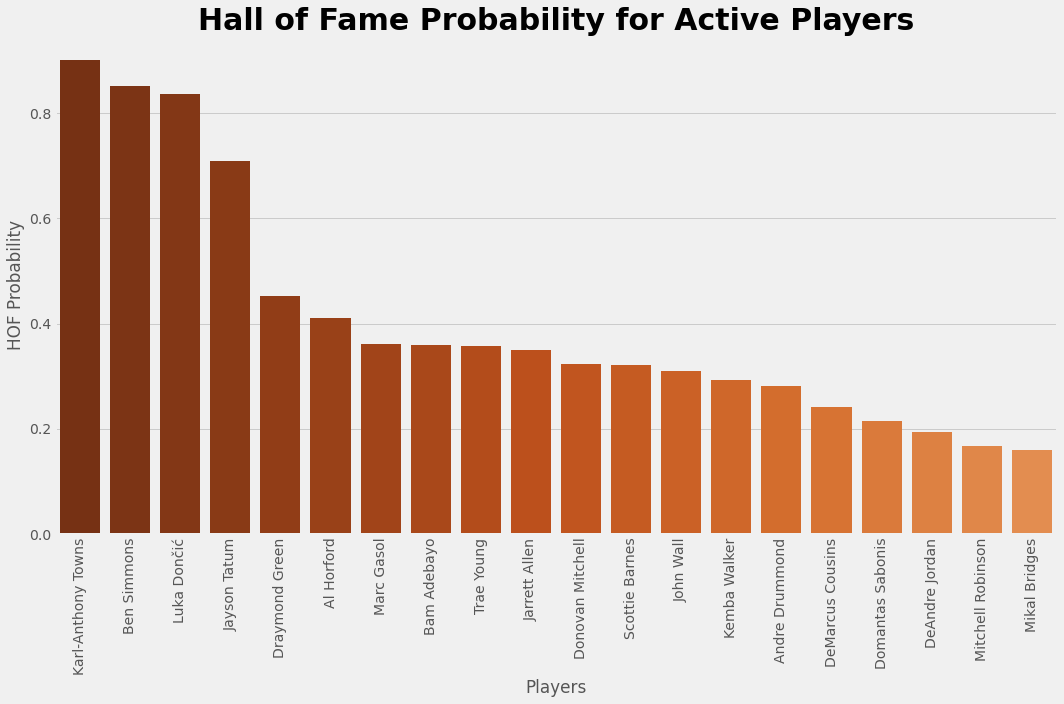

In [174]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=active_players[active_players['HOF (Y/N)'] == 0][:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(active_players[active_players['HOF (Y/N)'] == 0]['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Active Players', fontsize=30, fontweight='bold')
plt.tight_layout()

# plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [156]:
active_players[['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','HOF (Y/N)']].to_csv('csv_files/active_players_hof_prob', index=False)

In [170]:
# check for active players who are predicted to be hof locks
display(active_players[['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','HOF (Y/N)']][active_players['Debut'] >= 2019].head(20))
print(active_players[['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','HOF (Y/N)']][active_players['Debut'] >= 2019].shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N)
204,Scottie Barnes,2021,2022,1,PF,TOR,0.320306,0
4070,Zion Williamson,2019,2021,2,PF,NOP,0.118940,0
2577,Evan Mobley,2021,2022,1,PF,CLE,0.095672,0
183,Desmond Bane,2020,2022,2,SG,MEM,0.092587,0
1454,Tyrese Haliburton,2020,2022,2,PG,SAC,0.091076,0
675,Brandon Clarke,2019,2022,3,PF,MEM,0.084896,0
1939,Herbert Jones,2021,2022,1,PF,NOP,0.078067,0
2609,Ja Morant,2019,2022,3,PG,MEM,0.066621,0
179,LaMelo Ball,2020,2022,2,PG,CHO,0.062841,0
2380,Tyrese Maxey,2020,2022,2,SG,PHI,0.050029,0


(335, 8)


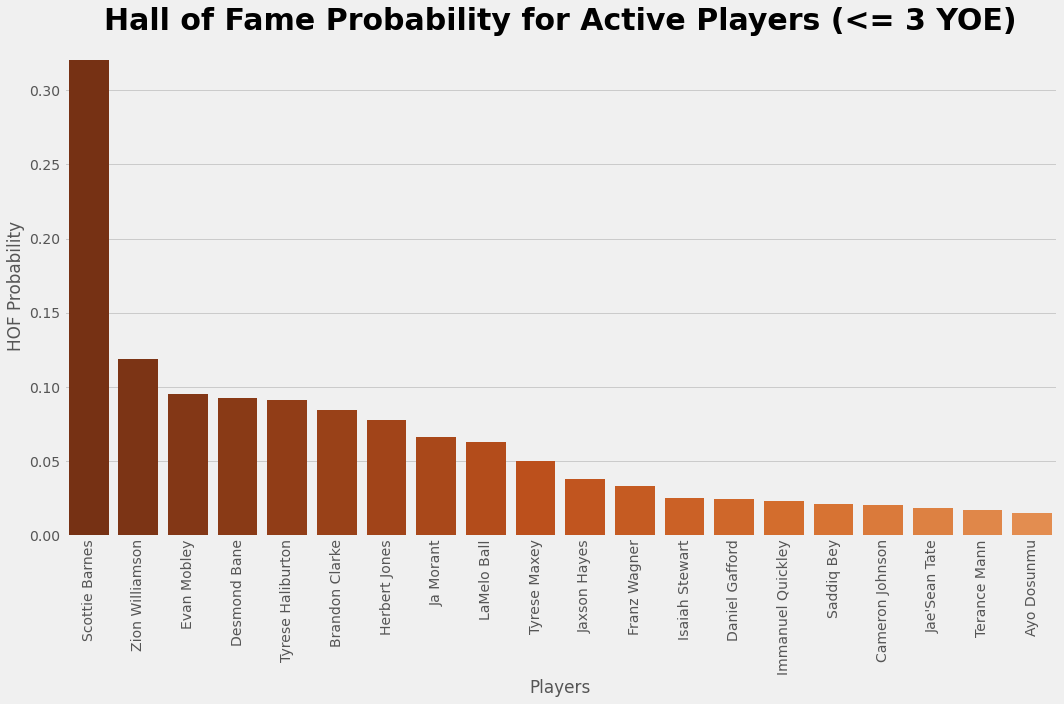

In [176]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=active_players[active_players['Debut'] >= 2019][:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(active_players[active_players['Debut'] >= 2019]['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Active Players (<= 3 YOE)', fontsize=30, fontweight='bold')
plt.tight_layout()

# plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [157]:
add_cols = ['Hall of Fame', 'Year Inducted']
for col in add_cols: show_columns.append(col)

In [169]:
# show players with highest hall of fame chances (retired and active)
nba_players_hof_prob = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)
display(nba_players_hof_prob[show_columns].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted,Inducted as Coach,Inducted as Contributor
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0,0,0,0,0
2,Kareem Abdul-Jabbar,1969,1989,20,C,LAL,1.000000,1,1,1,1995,0,0
634,Wilt Chamberlain,1959,1973,14,C,GSW,1.000000,1,1,1,1979,0,0
502,Kobe Bryant,1996,2016,20,SG,LAL,1.000000,1,1,1,2020,0,0
1972,Michael Jordan,1984,2003,15,SG,CHI,1.000000,1,1,1,2009,0,0
1005,Tim Duncan,1997,2016,19,C,SAS,1.000000,1,1,1,2020,0,0
3934,Jerry West,1960,1974,14,PG,LAL,1.000000,1,1,1,1980,0,0
2931,Bob Pettit,1954,1965,11,PF,ATL,1.000000,1,1,1,1971,0,0
3232,Bill Russell,1956,1969,13,C,BOS,1.000000,1,1,1,1975,0,0
2308,Karl Malone,1985,2004,19,PF,UTA,1.000000,1,1,1,2010,0,0


In [159]:
# check for retired players who aren't predicted to be hof locks (first ballot), but soon to be hofs
display(nba_players_hof_prob[show_columns][nba_players_hof_prob['HOF (Y/N)'] == 0].head(25))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted
1191,Larry Foust,1950,1962,12,C,DET,0.931547,0,0,0,0
3548,Amar'e Stoudemire,2002,2016,14,PF,PHO,0.919118,0,0,0,0
837,Brad Daugherty,1986,1994,8,C,CLE,0.909162,0,0,0,0
3712,Karl-Anthony Towns,2015,2022,7,C,MIN,0.901526,0,0,0,0
1892,Marques Johnson,1977,1990,11,SF,MIL,0.870376,0,0,0,0
3373,Ben Simmons,2017,2021,4,PG,PHI,0.852522,0,0,0,0
1886,Kevin Johnson,1987,2000,12,PG,PHO,0.845133,0,0,0,0
949,Luka Dončić,2018,2022,4,PG,DAL,0.836776,0,0,0,0
2004,Shawn Kemp,1989,2003,14,PF,OKC,0.808774,0,0,0,0
3594,Jayson Tatum,2017,2022,5,SF,BOS,0.708574,0,0,0,0


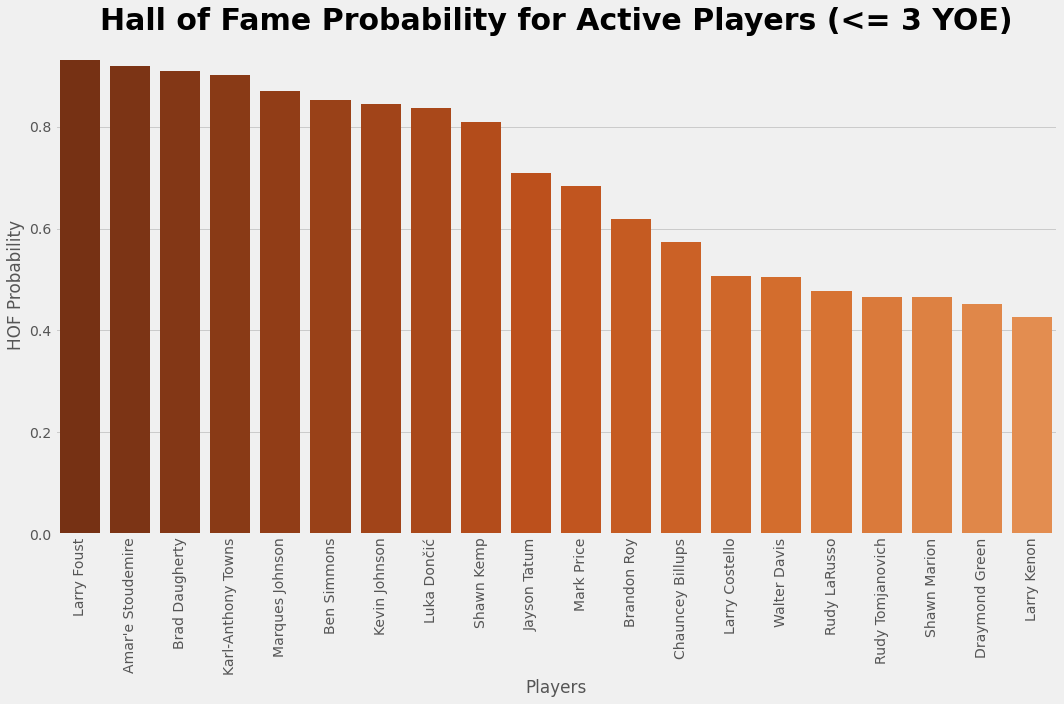

In [177]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', 
                 data=nba_players_hof_prob[nba_players_hof_prob['HOF (Y/N)'] == 0][:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(nba_players_hof_prob[nba_players_hof_prob['HOF (Y/N)'] == 0]['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Active Players (<= 3 YOE)', fontsize=30, fontweight='bold')
plt.tight_layout()

# plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [160]:
# current hall of famers who were not predicted to be in the hall of fame
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['HOF (Y/N)'] == 0) &
                                   (nba_players_hof_prob['Hall of Fame'] == 1) &
                                    (nba_players_hof_prob['Inducted as Player'] == 1)].head(50))

# non hall of famers predicted to be the hall of fame
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['Last Active'] <= 2018) &
                                   (nba_players_hof_prob['HOF (Y/N)'] == 1) &
                                   (nba_players_hof_prob['Hall of Fame'] == 0)].head())

# retired players with the highest probability, but not predicted as hall of famer
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['Last Active'] <= 2018) &
                                   (nba_players_hof_prob['HOF (Y/N)'] == 0) &
                                   (nba_players_hof_prob['Hall of Fame'] == 0) &
                                   (nba_players_hof_prob['HOF Probability'] >= 0.5)].head())

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted
3989,Jamaal Wilkes,1974,1986,12,SF,LAL,0.134803,0,1,1,2012
3240,Arvydas Sabonis,1995,2003,7,C,POR,0.134001,0,1,1,2011
3047,Frank Ramsey,1954,1964,9,SG,BOS,0.037145,0,1,1,1982
945,Vlade Divac,1989,2005,16,C,LAL,0.023067,0,1,1,2019
401,Bill Bradley,1967,1977,10,SF,NYK,0.020571,0,1,1,1983
1947,K.C. Jones,1958,1967,9,PG,BOS,0.018014,0,1,1,1989
3036,Dino Radja,1993,1997,4,PF,BOS,0.015664,0,1,1,2018
1690,Bob Houbregs,1953,1958,5,C,DET,0.013114,0,1,1,1987
2101,Toni Kukoč,1993,2006,13,SF,CHI,0.011045,0,1,1,2021
2327,Šarūnas Marčiulionis,1989,1997,7,SG,GSW,0.007128,0,1,1,2014


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted
1191,Larry Foust,1950,1962,12,C,DET,0.931547,0,0,0,0
3548,Amar'e Stoudemire,2002,2016,14,PF,PHO,0.919118,0,0,0,0
837,Brad Daugherty,1986,1994,8,C,CLE,0.909162,0,0,0,0
1892,Marques Johnson,1977,1990,11,SF,MIL,0.870376,0,0,0,0
1886,Kevin Johnson,1987,2000,12,PG,PHO,0.845133,0,0,0,0


In [161]:
# check current predicted hofs who have lowest probability
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['HOF (Y/N)'] == 1) &
                                          (nba_players_hof_prob['HOF Probability'] <= 0.5)].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted
1324,Tom Gola,1955,1966,10,SG,GSW,0.484348,1,1,1,1976
2255,Kyle Lowry,2006,2022,16,PG,TOR,0.464739,1,0,0,0
2252,Clyde Lovellette,1953,1964,11,C,LAL,0.437279,1,1,1,1988
419,Carl Braun,1947,1962,13,PG,NYK,0.399989,1,1,1,2019
3854,Bill Walton,1974,1987,10,C,POR,0.380351,1,1,1,1993
1879,Joe Johnson,2001,2022,18,SG,ATL,0.371704,1,0,0,0
1330,Gail Goodrich,1965,1979,14,SG,LAL,0.341852,1,1,1,1996
824,Bob Dandridge,1969,1982,13,SF,MIL,0.313837,1,1,1,2021
3132,Arnie Risen,1948,1958,10,C,SAC,0.266655,1,1,1,1998
1221,Joe Fulks,1946,1954,8,PF,GSW,0.213007,1,1,1,1978


In [162]:
# check which current retired players are hof locks
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['HOF (Y/N)'] == 1) &
                                          (nba_players_hof_prob['Last Active'] < 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted
2757,Dirk Nowitzki,1998,2019,21,PF,DAL,0.999994,1,0,0,0
3816,Dwyane Wade,2003,2019,16,SG,MIA,0.999953,1,0,0,0
1273,Pau Gasol,2001,2019,18,C,MEM,0.830497,1,0,0,0
2868,Tony Parker,2001,2019,18,PG,SAS,0.723936,1,0,0,0
609,Vince Carter,1998,2020,22,SG,TOR,0.555758,1,0,0,0


In [163]:
# predict hof locks and future hall of famers based on probability
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['Last Active'] < 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)].sort_values(by=['HOF (Y/N)','HOF Probability'], 
                                                                                              ascending=False).head(20))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted
2757,Dirk Nowitzki,1998,2019,21,PF,DAL,0.999994,1,0,0,0
3816,Dwyane Wade,2003,2019,16,SG,MIA,0.999953,1,0,0,0
1273,Pau Gasol,2001,2019,18,C,MEM,0.830497,1,0,0,0
2868,Tony Parker,2001,2019,18,PG,SAS,0.723936,1,0,0,0
609,Vince Carter,1998,2020,22,SG,TOR,0.555758,1,0,0,0
1191,Larry Foust,1950,1962,12,C,DET,0.931547,0,0,0,0
3548,Amar'e Stoudemire,2002,2016,14,PF,PHO,0.919118,0,0,0,0
837,Brad Daugherty,1986,1994,8,C,CLE,0.909162,0,0,0,0
1892,Marques Johnson,1977,1990,11,SF,MIL,0.870376,0,0,0,0
1886,Kevin Johnson,1987,2000,12,PG,PHO,0.845133,0,0,0,0


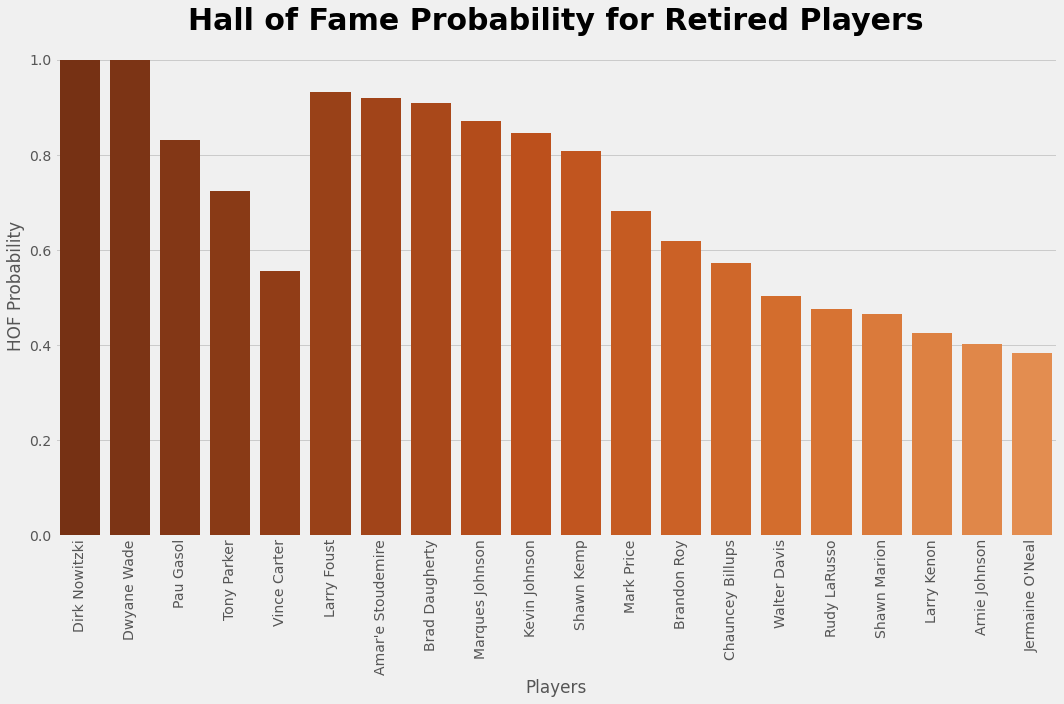

In [181]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', 
        data=nba_players_hof_prob[(nba_players_hof_prob['Last Active'] < 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)].sort_values(by=['HOF (Y/N)','HOF Probability'], 
                                                                                              ascending=False)[:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(nba_players_hof_prob[(nba_players_hof_prob['Last Active'] < 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)].sort_values(by=['HOF (Y/N)','HOF Probability'], 
                                                                                              ascending=False)['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Retired Players', fontsize=30, fontweight='bold')
plt.tight_layout()

# plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [164]:
show_columns.append('Inducted as Coach'); show_columns.append('Inducted as Contributor')

In [165]:
# check if any coaches or contributors should be selected as hall of famer (as player)
display(nba_players_hof_prob[show_columns][((nba_players_hof_prob['HOF (Y/N)'] == 1) &
                                          (nba_players_hof_prob['Year Inducted'] <= 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 1) &
                                          (nba_players_hof_prob['Retired'] == 1)) &
                                          ((nba_players_hof_prob['Inducted as Coach'] == 1) |
                                          (nba_players_hof_prob['Inducted as Contributor'] == 1))].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted,Inducted as Coach,Inducted as Contributor


In [166]:
# check all coaches or contributors who aren't predicted to be hof (as player)
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['HOF (Y/N)'] == 0) &
                                          (nba_players_hof_prob['Year Inducted'] <= 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 1) &
                                          (nba_players_hof_prob['Retired'] == 1) &
                                          (nba_players_hof_prob['Inducted as Coach'] == 1) |
                                          (nba_players_hof_prob['Inducted as Contributor'] == 1)].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Inducted as Player,Hall of Fame,Year Inducted,Inducted as Coach,Inducted as Contributor
758,Larry Costello,1954,1968,12,PG,PHI,0.506265,0,0,1,2022,0,1
3699,Rudy Tomjanovich,1970,1981,11,PF,HOU,0.465209,0,0,1,2020,1,0
1076,Wayne Embry,1958,1969,11,C,SAC,0.129910,0,0,1,1999,0,1
3409,Jerry Sloan,1965,1976,11,SG,CHI,0.044941,0,0,1,2009,1,0
2706,Don Nelson,1962,1976,14,SF,BOS,0.013857,0,0,1,2012,1,0
198,Don Barksdale,1951,1955,4,PF,BLB,0.010716,0,0,1,2012,0,1
3260,Tom Sanders,1960,1973,13,SF,BOS,0.009602,0,0,1,2011,0,1
141,Al Attles,1960,1971,11,PG,GSW,0.006914,0,0,1,2019,0,1
688,Nat Clifton,1950,1958,8,PF,NYK,0.006435,0,0,1,2014,0,1
2222,Earl Lloyd,1950,1960,9,SF,PHI,0.003826,0,0,1,2003,0,1


## Results and Evalution:

## Ethical Consideration:
**Legal Issues?:** <br>

Web scraping is legal if you scrape data publicly available on the internet. But some kinds of data are protected by international regulations, so we have to be careful scraping personal data, intellectual property, or confidential data. <br>

Though, some sites are likely to ban you if you scrape a site too much or too quickly. So far, I haven't had any problems with Basketball-Reference. To be safe, downloading the webpages are the best bet if you are trying to scrape large amounts of data. <br> <br>

**According to [clause 5](https://www.sports-reference.com/termsofuse.html) of Sports Reference:**

- Subject to the terms of this Agreement, you are granted a limited, personal, non-exclusive, non-sublicensable, non-assignable, non-transferable, and revocable license to access and use the Site and Content.
- This means that you should not create websites or tools based on data you scrape from Sports Reference or any of our sites.
- **Ultimately, I am granted to web scrap this website only for personal use and won't use my findings or tools to sell any information, or to create a personal website.** <br>

My project won’t harm the website in any way. More information on data usage can be found [here](https://www.sports-reference.com/data_use.html)

## Project Summary:
- What is an overview of your project?
- What are your project objectives?
- What are your technical contributions?
- What are the main results?
- How are the results evaluated?
- What are the future directions?